In [1]:
%load_ext google.cloud.bigquery

In [2]:

from google.cloud import bigquery
from google.cloud import bigquery_storage
import pandas as pd

In [3]:
#created a project of my own and filtered data based on various conditions as the whole data
#was really large and was not required for further analysis

project_id = 'myfirstproject-428213'
client = bigquery.Client(project=project_id)

query = """
SELECT
  *
FROM `bigquery-public-data.samples.gsod`
WHERE year >= 2005
  AND year <= 2009
  AND station_number >= 725300
  AND station_number <= 726300
"""


query_job = client.query(query)

first_results = query_job.result()

sample_df = first_results.to_dataframe()
sample_df

,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
0,725464,99999,2005,11,1,61.200001,4,28.000000,4,NaN,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
1,725869,99999,2005,7,27,67.599998,4,39.700001,4,NaN,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
2,725940,99999,2005,12,12,47.200001,4,41.299999,4,1020.500000,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
3,725940,99999,2005,3,5,50.400002,4,46.000000,4,1024.500000,...,NaN,<NA>,0.14,NaN,False,False,False,False,False,False
4,725525,99999,2005,9,24,85.099998,4,61.700001,4,1009.200012,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377779,725957,24215,2009,9,12,70.000000,24,40.799999,24,1013.700012,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
377780,725350,14848,2009,4,10,45.700001,24,24.799999,24,1013.099976,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
377781,725970,24225,2009,12,22,38.200001,24,32.500000,24,1017.799988,...,NaN,<NA>,0.10,NaN,False,False,False,False,False,False
377782,725540,99999,2009,12,5,23.299999,24,12.600000,24,1015.500000,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False


In [4]:
sample_df['date'] = pd.to_datetime(sample_df[['year','month','day']])
updated_df = sample_df.drop(columns=['year', 'month', 'day'])
updated_df = updated_df.reset_index(drop=True)

cols = updated_df.columns.tolist()
cols.insert(cols.index('station_number') + 1, cols.pop(cols.index('date')))
updated_df = updated_df[cols]

updated_df = updated_df.reset_index(drop=True)

updated_df

,station_number,date,wban_number,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,num_mean_sealevel_pressure_samples,mean_station_pressure,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
0,725464,2005-11-01,99999,61.200001,4,28.000000,4,NaN,<NA>,NaN,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
1,725869,2005-07-27,99999,67.599998,4,39.700001,4,NaN,<NA>,NaN,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
2,725940,2005-12-12,99999,47.200001,4,41.299999,4,1020.500000,4,1017.599976,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
3,725940,2005-03-05,99999,50.400002,4,46.000000,4,1024.500000,4,1021.700012,...,NaN,<NA>,0.14,NaN,False,False,False,False,False,False
4,725525,2005-09-24,99999,85.099998,4,61.700001,4,1009.200012,4,NaN,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377779,725957,2009-09-12,24215,70.000000,24,40.799999,24,1013.700012,23,NaN,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
377780,725350,2009-04-10,14848,45.700001,24,24.799999,24,1013.099976,24,NaN,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
377781,725970,2009-12-22,24225,38.200001,24,32.500000,24,1017.799988,24,NaN,...,NaN,<NA>,0.10,NaN,False,False,False,False,False,False
377782,725540,2009-12-05,99999,23.299999,24,12.600000,24,1015.500000,24,NaN,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False


In [5]:
new_filter_df = updated_df[(updated_df['station_number']>=725300) & (updated_df['station_number']<=725330)]
new_filter_df

,station_number,date,wban_number,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,num_mean_sealevel_pressure_samples,mean_station_pressure,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
75,725305,2005-01-07,99999,16.700001,23,13.100000,23,1021.200012,21,NaN,...,NaN,<NA>,0.01,NaN,False,False,False,False,False,False
76,725305,2005-07-19,99999,77.699997,23,55.599998,23,1014.400024,23,NaN,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
80,725317,2005-10-21,99999,49.500000,23,47.099998,23,1011.799988,19,NaN,...,NaN,<NA>,0.59,NaN,False,False,False,False,False,False
83,725327,2005-12-01,99999,26.000000,23,21.900000,23,1017.700012,18,NaN,...,NaN,<NA>,0.06,NaN,False,False,False,False,False,False
88,725314,2005-12-08,99999,19.600000,23,13.700000,23,1031.400024,20,NaN,...,NaN,<NA>,0.18,NaN,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377726,725320,2009-06-23,14842,85.000000,24,72.300003,24,1010.599976,24,NaN,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
377736,725315,2009-03-04,94870,33.000000,24,16.500000,24,1026.500000,24,NaN,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
377755,725300,2009-07-20,94846,65.699997,24,54.000000,24,1019.500000,24,NaN,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
377758,725316,2009-05-19,3887,62.599998,24,41.700001,24,1025.400024,24,NaN,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False


In [6]:
new_filter_df.isnull().sum()

station_number                            0
date                                      0
wban_number                               0
mean_temp                                 0
num_mean_temp_samples                     0
mean_dew_point                            2
num_mean_dew_point_samples                2
mean_sealevel_pressure                 1838
num_mean_sealevel_pressure_samples     1838
mean_station_pressure                 17136
num_mean_station_pressure_samples     17136
mean_visibility                           3
num_mean_visibility_samples               3
mean_wind_speed                           5
num_mean_wind_speed_samples               5
max_sustained_wind_speed                 10
max_gust_wind_speed                    6661
max_temperature                           2
max_temperature_explicit                  2
min_temperature                       18129
min_temperature_explicit              18129
total_precipitation                     191
snow_depth                      

In [7]:
new_filter_df.duplicated().sum()


0

In [8]:
new_filter_df.describe()


,station_number,date,wban_number,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,num_mean_sealevel_pressure_samples,mean_station_pressure,...,mean_visibility,num_mean_visibility_samples,mean_wind_speed,num_mean_wind_speed_samples,max_sustained_wind_speed,max_gust_wind_speed,max_temperature,min_temperature,total_precipitation,snow_depth
count,18129.0,18129,18129.0,18129.000000,18129.0,18127.000000,18127.0,16291.000000,16291.0,993.000000,...,18126.000000,18126.0,18124.000000,18124.0,18119.000000,11468.000000,18127.000000,0.0,17938.000000,565.000000
mean,725316.96205,2007-07-02 19:52:01.032599808,72766.474488,51.999636,23.574163,41.605108,23.553704,1016.937585,21.682217,990.766767,...,8.699388,23.565155,7.495834,23.528195,14.049412,23.153270,42.580692,NaN,0.095488,2.865133
min,725300.0,2005-01-01 00:00:00,3887.0,-16.200001,4.0,-23.500000,4.0,985.299988,4.0,967.599976,...,0.600000,4.0,0.000000,4.0,2.900000,11.100000,-34.599998,NaN,0.000000,1.200000
25%,725314.0,2006-04-01 00:00:00,14842.0,36.299999,24.0,27.500000,24.0,1012.799988,20.0,986.400024,...,7.900000,24.0,4.800000,24.0,9.900000,18.100000,28.400000,NaN,0.000000,1.200000
50%,725316.0,2007-07-03 00:00:00,99999.0,53.799999,24.0,42.599998,24.0,1016.700012,23.0,990.700012,...,9.500000,24.0,7.000000,24.0,13.000000,22.000000,44.099998,NaN,0.000000,2.000000
75%,725326.0,2008-10-01 00:00:00,99999.0,69.099998,24.0,57.200001,24.0,1020.900024,24.0,995.000000,...,10.000000,24.0,9.600000,24.0,16.900000,27.000000,57.900002,NaN,0.040000,3.900000
max,725330.0,2009-12-31 00:00:00,99999.0,92.000000,24.0,79.099998,24.0,1044.199951,24.0,1017.099976,...,10.900000,24.0,24.000000,24.0,49.000000,63.900002,87.800003,NaN,9.990000,13.000000
std,8.979529,NaN,39561.090384,19.392603,1.81723,18.494937,1.857548,6.920370,3.198832,7.302087,...,1.730177,1.829544,3.581758,1.928344,5.241219,6.382058,18.646582,NaN,0.279290,2.105886


In [9]:
new_filter_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18129 entries, 75 to 377783
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   station_number                      18129 non-null  Int64         
 1   date                                18129 non-null  datetime64[ns]
 2   wban_number                         18129 non-null  Int64         
 3   mean_temp                           18129 non-null  float64       
 4   num_mean_temp_samples               18129 non-null  Int64         
 5   mean_dew_point                      18127 non-null  float64       
 6   num_mean_dew_point_samples          18127 non-null  Int64         
 7   mean_sealevel_pressure              16291 non-null  float64       
 8   num_mean_sealevel_pressure_samples  16291 non-null  Int64         
 9   mean_station_pressure               993 non-null    float64       
 10  num_mean_station_pressure

In [10]:
#removed those columns which had more than 50% of the data missing and also did mean imputation on the rest

threshold = 0.5
cols_to_drop = new_filter_df.columns[new_filter_df.isnull().mean() > threshold]
new_filter_df = new_filter_df.drop(columns=cols_to_drop)

int_cols = new_filter_df.select_dtypes(include=['float64']).columns
for col in int_cols:
    new_filter_df[col] = new_filter_df[col].fillna(new_filter_df[col].mean()).astype('float64')

remaining_missing = new_filter_df.isnull().sum()

new_filter_df = new_filter_df.dropna()

new_filter_df

,station_number,date,wban_number,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,num_mean_sealevel_pressure_samples,mean_visibility,...,max_gust_wind_speed,max_temperature,max_temperature_explicit,total_precipitation,fog,rain,snow,hail,thunder,tornado
75,725305,2005-01-07,99999,16.700001,23,13.100000,23,1021.200012,21,8.4,...,23.15327,6.800000,True,0.01,False,False,False,False,False,False
76,725305,2005-07-19,99999,77.699997,23,55.599998,23,1014.400024,23,10.0,...,15.90000,60.799999,True,0.00,False,False,False,False,False,False
80,725317,2005-10-21,99999,49.500000,23,47.099998,23,1011.799988,19,7.3,...,19.00000,46.400002,True,0.59,False,False,False,False,False,False
83,725327,2005-12-01,99999,26.000000,23,21.900000,23,1017.700012,18,7.0,...,20.00000,19.400000,True,0.06,False,False,False,False,False,False
88,725314,2005-12-08,99999,19.600000,23,13.700000,23,1031.400024,20,6.9,...,20.00000,15.100000,False,0.18,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377726,725320,2009-06-23,14842,85.000000,24,72.300003,24,1010.599976,24,9.2,...,23.15327,75.000000,False,0.00,False,False,False,False,False,False
377736,725315,2009-03-04,94870,33.000000,24,16.500000,24,1026.500000,24,10.0,...,22.00000,21.000000,False,0.00,False,False,False,False,False,False
377755,725300,2009-07-20,94846,65.699997,24,54.000000,24,1019.500000,24,10.0,...,15.00000,55.000000,False,0.00,False,False,False,False,False,False
377758,725316,2009-05-19,3887,62.599998,24,41.700001,24,1025.400024,24,10.0,...,19.00000,48.900002,False,0.00,False,False,False,False,False,False


In [11]:
#fog, rain, snow, hail, thunder and tornado were boolean, changed them to binary

boolean_columns = new_filter_df.select_dtypes(include=['bool']).columns.tolist()
boolean_columns

new_filter_df[boolean_columns] = new_filter_df[boolean_columns].astype(int)
new_filter_df.head()

,station_number,date,wban_number,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,num_mean_sealevel_pressure_samples,mean_visibility,...,max_gust_wind_speed,max_temperature,max_temperature_explicit,total_precipitation,fog,rain,snow,hail,thunder,tornado
75,725305,2005-01-07,99999,16.700001,23,13.100000,23,1021.200012,21,8.4,...,23.15327,6.800000,1,0.01,0,0,0,0,0,0
76,725305,2005-07-19,99999,77.699997,23,55.599998,23,1014.400024,23,10.0,...,15.90000,60.799999,1,0.00,0,0,0,0,0,0
80,725317,2005-10-21,99999,49.500000,23,47.099998,23,1011.799988,19,7.3,...,19.00000,46.400002,1,0.59,0,0,0,0,0,0
83,725327,2005-12-01,99999,26.000000,23,21.900000,23,1017.700012,18,7.0,...,20.00000,19.400000,1,0.06,0,0,0,0,0,0
88,725314,2005-12-08,99999,19.600000,23,13.700000,23,1031.400024,20,6.9,...,20.00000,15.100000,0,0.18,1,1,1,1,1,1


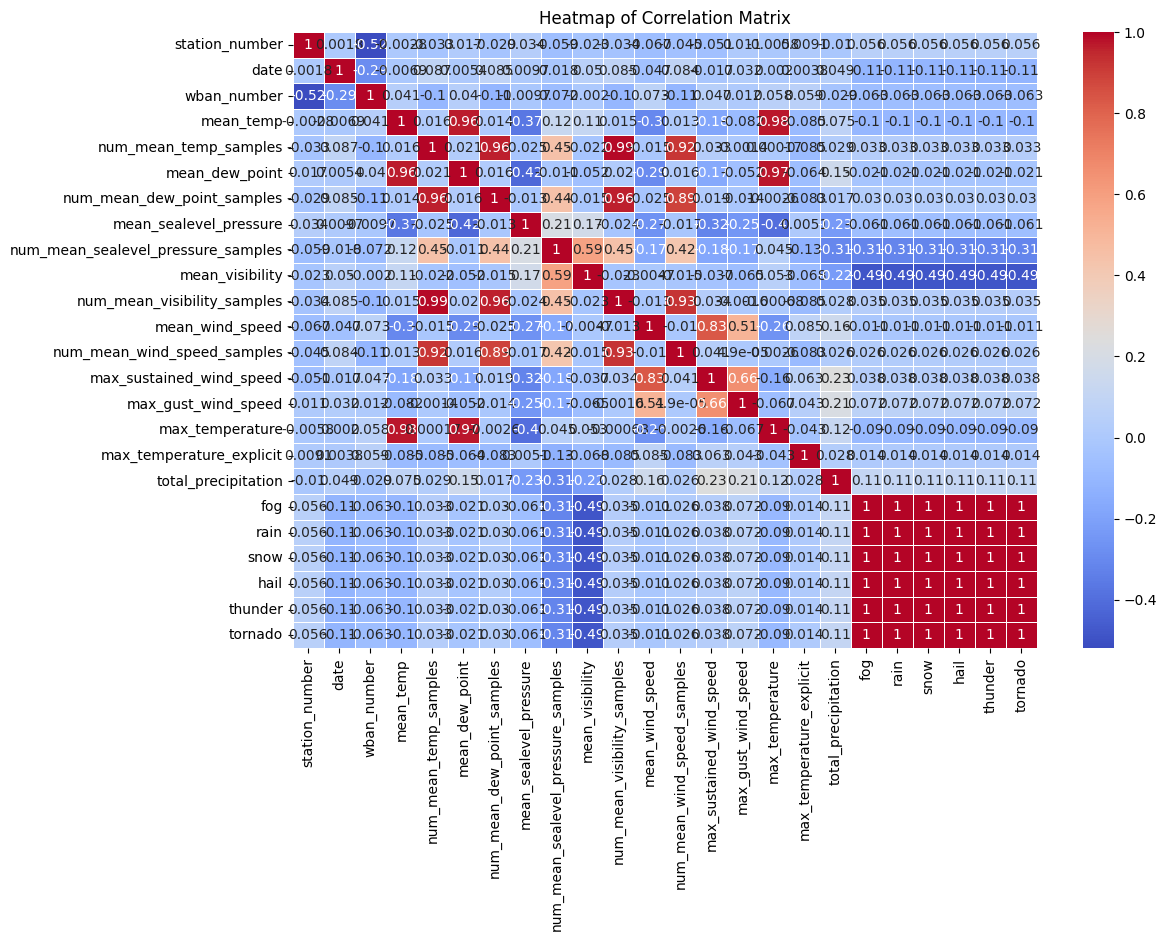

In [12]:
#created a correlation heatmap to check the correlation between columns and drop the ones not required accordingly

import matplotlib.pyplot as plt
import seaborn as sns
correlation= new_filter_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [13]:
#checked for high correlted columns and kept the relevant ones

import numpy as np
correlation_matrix = new_filter_df.corr().abs()
corr_threshold = 0.9


mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

tri_df = correlation_matrix.where(mask)
high_corr = [column for column in tri_df.columns if any(tri_df[column] > corr_threshold)]

high_corr

['station_number',
 'date',
 'wban_number',
 'mean_temp',
 'num_mean_temp_samples',
 'mean_dew_point',
 'num_mean_dew_point_samples',
 'mean_sealevel_pressure',
 'num_mean_sealevel_pressure_samples',
 'mean_visibility',
 'num_mean_visibility_samples',
 'mean_wind_speed',
 'num_mean_wind_speed_samples',
 'max_sustained_wind_speed',
 'max_gust_wind_speed',
 'max_temperature',
 'max_temperature_explicit',
 'total_precipitation',
 'fog',
 'rain',
 'snow',
 'hail',
 'thunder',
 'tornado']

In [14]:
#created a new dataframe with relevant variables

new_filter_df.set_index('date', inplace=True)
relevant_features = ['mean_temp', 'snow']
final_df = new_filter_df[relevant_features]
final_df

,mean_temp,snow
date,,
2005-01-07,16.700001,0
2005-07-19,77.699997,0
2005-10-21,49.500000,0
2005-12-01,26.000000,0
2005-12-08,19.600000,1
...,...,...
2009-06-23,85.000000,0
2009-03-04,33.000000,0
2009-07-20,65.699997,0


In [15]:
import datetime as dt
date_forecast = str(dt.datetime.today()- dt.timedelta(days=15*365)).split(' ')[0]


In [16]:

train_data = final_df[final_df.index < date_forecast]
test_data = final_df[final_df.index == date_forecast]

In [17]:
#order parameter here specifies the configuration of the model in terms 
#of its autoregressive order(AR), differencing order (I), and moving average order (MA) components(p,d,q)

from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(train_data['mean_temp'], order=(5, 1, 0)) 
arima_result = arima_model.fit()


/home/aashimab07/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/aashimab07/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/aashimab07/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/aashimab07/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, 

In [18]:
# Forecast for the day before and the target day

forecast_steps = 2 
forecast_results = arima_result.get_forecast(steps=forecast_steps)
forecast_mean = forecast_results.predicted_mean
forecast_ci = forecast_results.conf_int()

/home/aashimab07/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/aashimab07/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [19]:
forecast_dates = pd.date_range(start=pd.to_datetime(date_forecast) - pd.Timedelta(days=1), periods=forecast_steps, freq='D')
for i, date in enumerate(forecast_dates):
    forecast_value = forecast_mean.iloc[i]
    forecast_conf_int = forecast_ci.iloc[i]
    print(f"Forecast for {date.date()}: {forecast_value} (CI: {forecast_conf_int.values})")


Forecast for 2009-07-21: 49.77716447417155 (CI: [ 8.55956614 90.99476281])
Forecast for 2009-07-22: 54.278701469210894 (CI: [12.35463948 96.20276346])


In [20]:
#snow_days filters data to include only days when it snowed 
#then average temp is calculated
#threshold temperature slightly below the average snow temperature

snow_days = final_df[final_df['snow'] == 1]
average_snow_temp = snow_days['mean_temp'].mean()
threshold_temp = average_snow_temp - 2

predicted_snow = forecast_mean.apply(lambda x: 1 if x < threshold_temp else 0)

for i, date in enumerate(forecast_dates):
    print(f"Prediction for snow on {date.date()}: {'Yes' if predicted_snow.iloc[i] else 'No'}")


Prediction for snow on 2009-07-21: No
Prediction for snow on 2009-07-22: No
